# Direcionamento dos Depósitos de Poupança para Construção Civil

Deve corresponder ao valor contábil bruto dos financiamentos a pessoas naturais para construção de imóveis residenciais (nas condições do Sistema Financeiro de Habitação - SFH ou não) e de imóveis não residenciais.

Fonte: https://www.bcb.gov.br/estatisticas/grafico/graficocosic/direcionamento_construcao

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

gasto_construcao = pd.read_csv('datasets/Construcao_2014_2020.csv', sep = ';', decimal=',', parse_dates=[0]) # Gasto com a Construção Civil - BACEN.

gasto_construcao['DateTime'] = gasto_construcao['DateTime'].apply(lambda x: x.replace(day=1))

gasto_construcao = gasto_construcao.set_index('DateTime')

gasto_construcao = gasto_construcao['2014-01-01':'2020-12-12']

taxa = gasto_construcao.loc['2014-05-01']['Imobiliário']/gasto_construcao.loc['2014-04-01']['Imobiliário']

# Pensar o que fazer em relação a estes 3 meses
gasto_construcao.loc[pd.to_datetime('2014-03-01')] = gasto_construcao.loc['2014-04-01'].values[0]/taxa
gasto_construcao.loc[pd.to_datetime('2014-02-01')] = gasto_construcao.loc['2014-03-01'].values[0]/taxa
gasto_construcao.loc[pd.to_datetime('2014-01-01')] = gasto_construcao.loc['2014-02-01'].values[0]/taxa

gasto_construcao = gasto_construcao.sort_index(ascending=True)

gasto_construcao # Gastos com a Construção Civil (residencial + comercial) em bilhões de reais.



,Imobiliário
DateTime,
2014-01-01,1.827669e+10
2014-02-01,1.859720e+10
2014-03-01,1.892334e+10
2014-04-01,1.925519e+10
2014-05-01,1.959286e+10
...,...
2020-08-01,5.106029e+10
2020-09-01,5.152290e+10
2020-10-01,5.201850e+10


<AxesSubplot:xlabel='DateTime', ylabel='Imobiliário'>

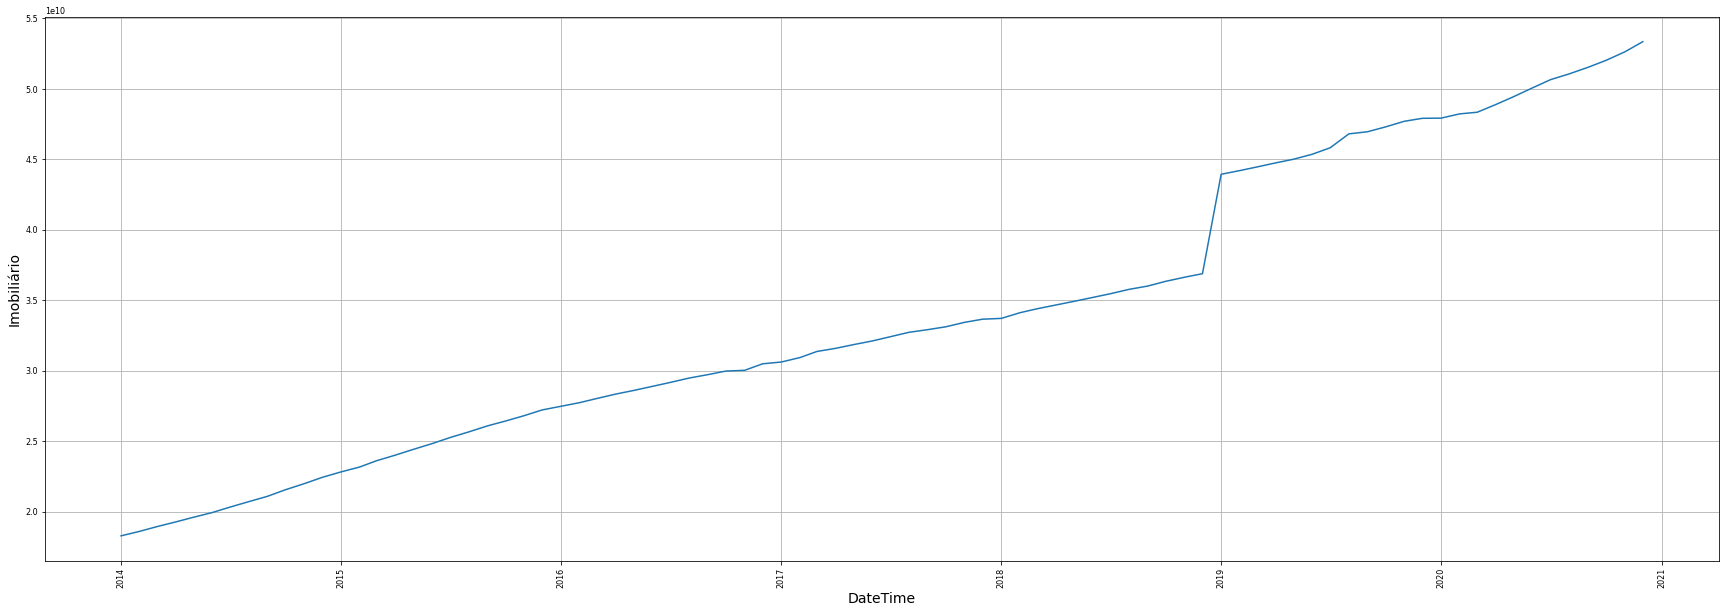

In [2]:
plt.figure(figsize=(30,10))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
plt.xticks(rotation=90)
plt.grid(True)
sns.lineplot(data=gasto_construcao, x = "DateTime", y = "Imobiliário")

Salvamos o objeto **gasto_construcao** para utilizar no [Passo 2](passo2.ipynb)

In [3]:
file_to_store = open("datasets/gasto_construcao.pickle", "wb")
pickle.dump(gasto_construcao, file_to_store)
file_to_store.close()